In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cleveland - cleveland.csv', header = None)

In [ ]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [ ]:
### Mapeia as classes transformando o problema em binário
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [ ]:
### Verifica se há valores nulos
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
# Calculando a média de cada coluna
media_por_coluna = df.mean()

# Substituindo os valores nulos pela média de cada coluna
df_preenchido = df.fillna(media_por_coluna)

# ainda há valores nulos?
print("Valores nulos após o preenchimento:")
print(df_preenchido.isna().sum())


Valores nulos após o preenchimento:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
X = df_preenchido.iloc[:, :-1].values
y = df_preenchido.iloc[:, -1].values

In [ ]:
## Separa os dados em treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
## Normaliza os dados
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Ajustando o scaler aos dados e transformando os dados
dados_normalizados = scaler.fit_transform(df)

# Convertendo os dados normalizados de volta para um DataFrame, se necessário
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns)

# Visualizando os dados normalizados
print(df_normalizado)


          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1    1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2    1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3   -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4   -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   
..        ...       ...       ...       ...       ...       ...       ...   
298 -1.046013  0.686202 -2.251775 -1.234430  0.334813 -0.417635 -0.996749   
299  1.502821  0.686202  0.877985  0.700612 -1.038723  2.394438 -0.996749   
300  0.283813  0.686202  0.877985 -0.096170 -2.238149 -0.417635 -0.996749   
301  0.283813 -1.457296 -1.208521 -0.096170 -0.206864 -0.417635  1.016684   
302 -1.821745  0.686202 -0.165268  0.359134 -1.386944 -0.417635 -0.996749   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [ ]:
# Treinamento Modelo
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

[[117  12]
 [ 20  93]]
[[30  5]
 [ 8 18]]


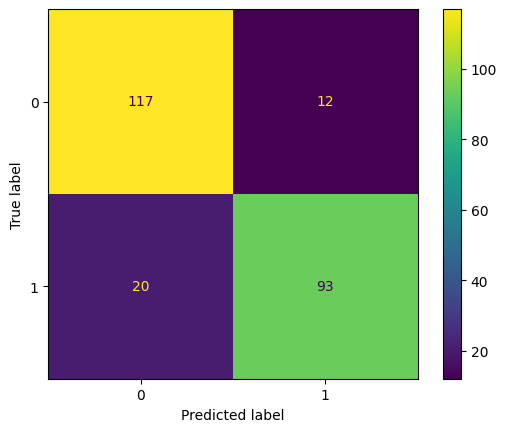

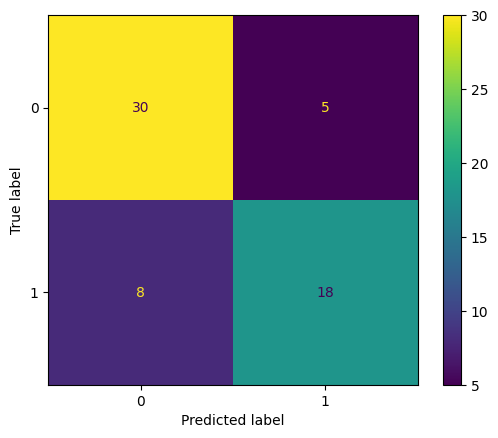

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
disp = ConfusionMatrixDisplay(cm_train, display_labels=classifier.classes_)
disp.plot()

y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test, display_labels=classifier.classes_)
disp.plot()

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA aos dados imputados
pca = PCA(n_components=8)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

classifier_pca = GaussianNB()
classifier_pca.fit(X_train_pca, y_train)

GaussianNB()

[[110  19]
 [ 17  96]]
[[32  3]
 [ 7 19]]


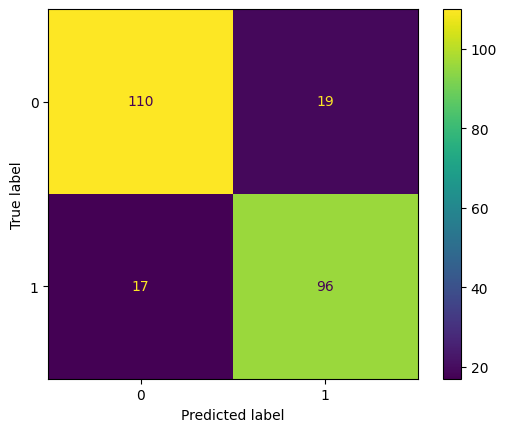

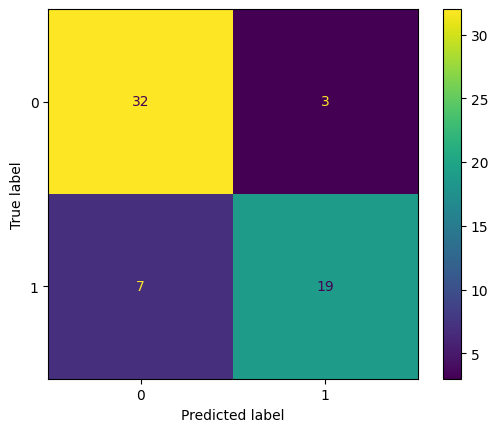

In [ ]:
y_pred_train_pca = classifier_pca.predict(X_train_pca)
cm_train_pca = confusion_matrix(y_train, y_pred_train_pca)
print(cm_train_pca)
disp = ConfusionMatrixDisplay(cm_train_pca, display_labels=classifier_pca.classes_)
disp.plot()

y_pred_test_pca = classifier_pca.predict(X_test_pca)
cm_test_pca = confusion_matrix(y_test, y_pred_test_pca)
print(cm_test_pca)
disp = ConfusionMatrixDisplay(cm_test_pca, display_labels=classifier_pca.classes_)
disp.plot()

In [ ]:
#knn = Separando o data set em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Matriz de Confusão teste
[[30  8]
 [ 5 18]]


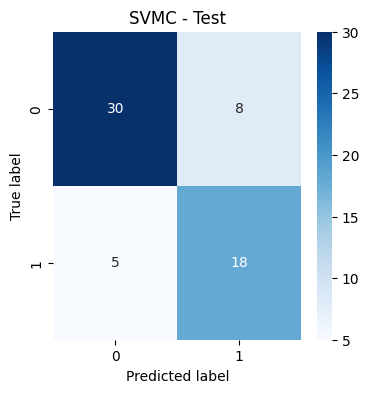

Matriz de Confusão treinamento
[[118  21]
 [ 11  92]]


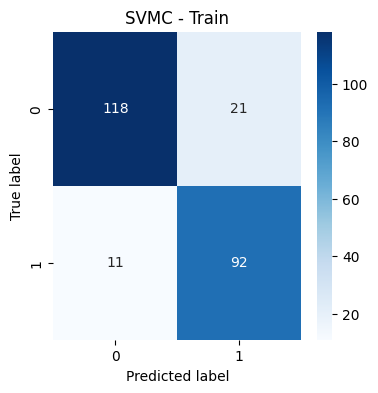


Accuracy for training set for SVMC = 0.8677685950413223
Accuracy for test set for SVMC = 0.7868852459016393


In [ ]:
#########################################   SVC Linear  #############################################################
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Treinamento Modelo
SVMC = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
SVMC.fit(X_train, y_train)

# Teste modelo
SVMC.predict(X_test)


#gera matriz de confusão dos dados de teste
cm_test = confusion_matrix(y_pred, y_test)
#imprime a matriz de confusão
print ('Matriz de Confusão teste')
print(cm_test)

# Teste modelo
y_pred = SVMC.predict(X_test)

# Para uma visualização melhor, você pode usar a biblioteca Seaborn para plotar a matriz de confusão
plt.figure(figsize=(4,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SVMC - Test')
plt.show()

#gera matriz de confusão dos dados de treinamento
y_pred_train = SVMC.predict(X_train)
#imprime a matriz de confusão
cm_train = confusion_matrix(y_pred_train, y_train)
print ('Matriz de Confusão treinamento')
print(cm_train)


# Para uma visualização melhor, você pode usar a biblioteca Seaborn para plotar a matriz de confusão
plt.figure(figsize=(4,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SVMC - Train')
plt.show()


print()
print('Accuracy for training set for SVMC = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for SVMC = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Matriz de Confusão teste
[[31  9]
 [ 4 17]]


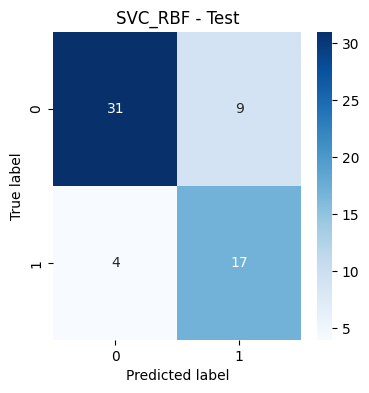

Matriz de Confusão treinamento
[[103  25]
 [ 26  88]]


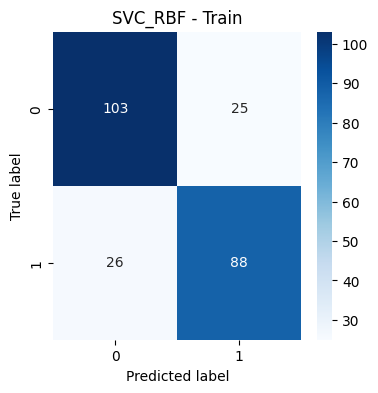


Accuracy for training set for SVC_RBF = 0.7892561983471075
Accuracy for test set for SVC_RBF = 0.7868852459016393


In [ ]:
#########################################   SVC RBF  #############################################################


from sklearn.svm import SVC

# Treinamento Modelo
SVC_RBF = SVC(kernel="rbf", gamma=0.001)
SVC_RBF.fit(X_train, y_train)

# Teste modelo
SVC_RBF.predict(X_test)


#gera matriz de confusão dos dados de teste
cm_test = confusion_matrix(y_pred, y_test)
#imprime a matriz de confusão
print ('Matriz de Confusão teste')
print(cm_test)

# Para uma visualização melhor, você pode usar a biblioteca Seaborn para plotar a matriz de confusão
plt.figure(figsize=(4,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SVC_RBF - Test')
plt.show()

#gera matriz de confusão dos dados de treinamento
y_pred_train = SVC_RBF.predict(X_train)
#imprime a matriz de confusão
cm_train = confusion_matrix(y_pred_train, y_train)
print ('Matriz de Confusão treinamento')
print(cm_train)


# Para uma visualização melhor, você pode usar a biblioteca Seaborn para plotar a matriz de confusão
plt.figure(figsize=(4,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SVC_RBF - Train')
plt.show()


print()
print('Accuracy for training set for SVC_RBF = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for SVC_RBF = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

In [ ]:
### Aplicando PCA no DATASET ###

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train) #somente os dois primeiros SCORES, nao entendi, seria isso 'n_components=2'?
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

[[31  9]
 [ 4 17]]
[[25 10]
 [13 13]]


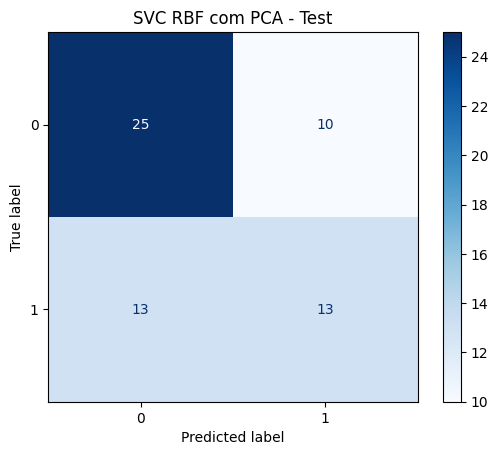

[[96 31]
 [33 82]]
[[96 33]
 [31 82]]


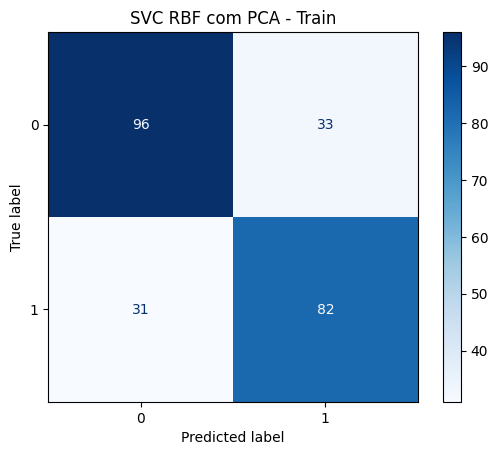


Accuracy for training set for SVC RBF com PCA = 0.7355371900826446
Accuracy for test set for SVC RBF com PCA = 0.7868852459016393


In [ ]:
#########################################   SVC RBF com dataset PCA  #############################################################


from sklearn.svm import SVC

# Treinamento Modelo
SVC_RBF = SVC(kernel="rbf", gamma=0.001)
SVC_RBF.fit(X_train_PCA, y_train)

# Teste modelo
SVC_RBF.predict(X_test_PCA)


# Resultados
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_test = confusion_matrix(y_pred, y_test)
print(cm_test)

disp = ConfusionMatrixDisplay.from_estimator(SVC_RBF, X_test_PCA, y_test, cmap=plt.cm.Blues)
#disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('SVC RBF com PCA - Test')
print(disp.confusion_matrix)
plt.show()

y_pred_train = SVC_RBF.predict(X_train_PCA)
cm_train = confusion_matrix(y_pred_train, y_train)
print(cm_train)

disp = ConfusionMatrixDisplay.from_estimator(SVC_RBF, X_train_PCA, y_train, cmap=plt.cm.Blues)
#disp = plot_confusion_matrix(classifier, X_train, y_train, cmap=plt.cm.Blues)
disp.ax_.set_title('SVC RBF com PCA - Train')
print(disp.confusion_matrix)
plt.show()

print()
print('Accuracy for training set for SVC RBF com PCA = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for SVC RBF com PCA = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit


In [ ]:
svc_rbf = SVC(kernel='rbf', random_state=42)


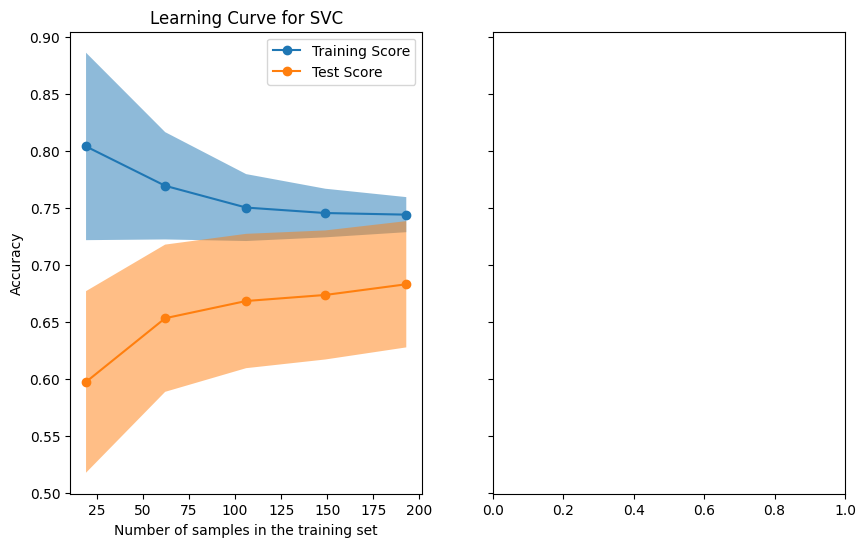

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train_pca,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([svc_rbf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

plt.show()
